In [12]:
import re

original = "../../datasets/doggy_data/val_ft_output_1000"

with open(original, 'r') as file:
    lines = file.readlines()
    tags = []
    for line in lines:
        match = re.search(r'<([^>]+)>', line)
        if match:
            tags.append(match.group(1))

print(tags)


file = "../../sample_outputs/2024_09_03__14_47_58/t5_baseline_small_ft_only_debug_samples"
originals = []
samples = []
with open(file, "r") as handle:
    lines = handle.readlines()
    lines_iter = iter(lines)
    for line in lines_iter:
        if line.startswith("target: "):
            original = line.strip("target: ").strip("\n")
            next(lines_iter)
            generated = next(lines_iter).strip("\n")
            if generated == "":
                originals.append(original)
                samples.append("")
            else:
                originals.append(original)
                samples.append(generated)


['heavy', 'heavy', 'light_kappa', 'light_kappa', 'light_kappa', 'heavy', 'light_kappa', 'light_kappa', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'light_kappa', 'light_kappa', 'light_kappa', 'heavy', 'light_kappa', 'heavy', 'light_kappa', 'light_kappa', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'heavy', 'heavy', 'light_kappa', 'heavy', 'heavy', 'light_kappa', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'heavy', 'light_kappa', 'heavy', 'heavy', 'heavy', 'light_kappa', 'heavy', 'light_kappa', 'heavy', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'light_kappa', 'heavy', 'heavy', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'light_kappa', 'light_kappa', 'heavy', 'heavy', 'light_kappa', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'light_kappa', 'light_kappa', 'he

Average Alignment Score: 11.877


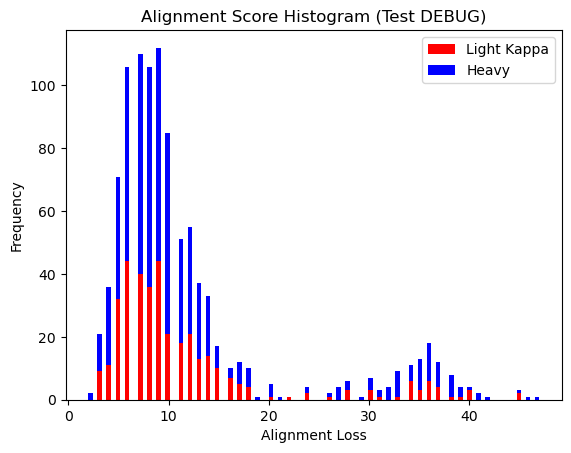

In [14]:
from Bio import Align
from Bio.Align import substitution_matrices
import pandas as pd

aligner = Align.PairwiseAligner()
aligner.mode = 'global'
# aligner.open_gap_score = -11
# aligner.extend_gap_score = -1
# aligner.substitution_matrix = substitution_matrices.load(name='PAM30')

aligner.open_gap_score = 0
aligner.extend_gap_score = 0

alignment_scores = []
alignment_targets = []
alignment_losses = []

import matplotlib.pyplot as plt


for i in range(len(originals)):
    alignment = aligner.align(originals[i], samples[i])
    alignment_target = aligner.align(originals[i], originals[i])
    alignment_scores.append(alignment.score)
    alignment_targets.append(alignment_target.score)
    alignment_losses.append(alignment_target.score - alignment.score)

average_score = sum(alignment_losses) / len(alignment_scores)
print("Average Alignment Score:", average_score)

df = pd.DataFrame({'losses': alignment_losses, 'tags': tags})

df_light_kappa = df[df['tags'] == 'light_kappa']['losses']
df_heavy = df[df['tags'] == 'heavy']['losses']

colors = ['red', 'blue']
labels = ['Light Kappa', 'Heavy']

plt.hist([df_light_kappa, df_heavy], bins=100, color=colors, label=labels, histtype='barstacked')
# plt.hist(df_heavy['losses'], bins=100, color='blue', label='Heavy', histtype='barstacked')
plt.xlabel('Alignment Loss')
plt.ylabel('Frequency')
plt.title('Alignment Score Histogram (Test DEBUG)')
plt.legend()
plt.show()